In [5]:
!pip3 install --upgrade --user numexpr bottleneck pandas openpyxl


In [12]:
import pandas as pd

df = pd.read_csv('curricula_backup.tsv', sep='\t')
df

,author,title,comment,curriculum,id,year,grade,priority
0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,Бальмонт К.Д.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,Брюсов В.Я.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...
10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


1938 и 1939 гг. 
1962 и 1963 гг.   
1966 и 1967 гг.
1967 и 1972 гг.

In [13]:
df.duplicated().sum()

11

In [14]:
df.shape

(10306, 8)

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(10295, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 10305
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      10034 non-null  object
 1   title       8752 non-null   object
 2   comment     443 non-null    object
 3   curriculum  10295 non-null  object
 4   id          10295 non-null  int64 
 5   year        10295 non-null  object
 6   grade       10295 non-null  int64 
 7   priority    5658 non-null   object
dtypes: int64(2), object(6)
memory usage: 723.9+ KB


In [28]:
years = ['1937-38', '1939', '1962', '1963', '1966', '1967', '1967', '1972']
df[df['year'].isin(years)].shape[0]/df.shape[0]

0.09305488101019913

In [24]:
df['year'].value_counts()

year
1991       519
1940       376
1939       375
1933       341
1982       282
1984       282
1983       281
1988       278
1987       278
1986       278
1985       278
1949       276
1950       273
1980       269
1981       265
1979       265
1975       264
1974       264
1978       264
1977       264
1976       264
1951       263
1941       263
1942       231
1934       214
1946       204
1948       200
1922       191
1973       188
1972       187
1944       187
1947       185
1919       160
1932       122
1964       116
1956       114
1963       113
1954       109
1965       107
1938       107
1966       104
1960       103
1959       103
1958       103
1957       103
1961       103
1967       102
1962        65
1937-38     12
Name: count, dtype: int64

удаленный датасет - df_del (10% удалено примерно)  
df - все годы

In [29]:
df_del = df.drop(df[df['year'].isin(years)].index)
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [30]:
df_del.shape

(9337, 8)

In [31]:
df['year'] = df['year'].apply(lambda x: 1937 if x == '1937-38' else x)

In [32]:
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [33]:
import datetime as dt
df_del['year'] = pd.to_datetime(df_del['year'], format='%Y').dt.year
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

In [35]:
df_del.to_csv('del_s4.csv')
df.to_csv('s4.csv')

In [59]:
df = pd.read_csv('s4.csv')
df_del = pd.read_csv('del_s4.csv')

In [36]:
df

,author,title,comment,curriculum,id,year,grade,priority
0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,Бальмонт К.Д.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,Брюсов В.Я.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...
10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


In [54]:
pd.set_option('display.max_rows', 25)

In [51]:
df.groupby('author').nunique()

,title,comment,curriculum,id,year,grade,priority
author,,,,,,,
Абашидзе И.В.,1,0,15,15,15,1,1
Абрамов Ф.А.,3,0,16,16,16,2,1
Аверченко А.Т.,2,0,1,1,1,1,1
Авижюс Й.,1,0,15,15,15,1,1
Адамович А.М.,1,0,4,4,4,1,1
Адамович Г.В.,0,0,1,1,1,1,1
Ажаев В.Н.,1,0,7,7,7,1,1
Айбек М.,1,0,15,15,15,1,1
Айни С.,0,0,15,15,15,1,1


In [85]:
long = pd.DataFrame(df.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [86]:
long

,author,count
0,Толстой Л.Н.,49
1,Салтыков-Щедрин М.Е.,49
2,Горький М.,49
3,Маяковский В.В.,48
4,Тургенев И.С.,48
5,Чехов А.П.,48
6,Островский А.Н.,48
7,Некрасов Н.А.,48
8,Добролюбов Н.А.,47
9,Фадеев А.А.,46


In [87]:
short = pd.DataFrame(df_del.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [88]:
merged_df = long.join(short, how='outer', lsuffix='_long', rsuffix='_short')

In [89]:
merged_df

,author_long,count_long,author_short,count_short
0,Толстой Л.Н.,49,Лермонтов М.Ю.,42
1,Салтыков-Щедрин М.Е.,49,Гоголь Н.В.,42
2,Горький М.,49,Тургенев И.С.,42
3,Маяковский В.В.,48,Горький М.,42
4,Тургенев И.С.,48,Грибоедов А.С.,42
5,Чехов А.П.,48,Толстой Л.Н.,42
6,Островский А.Н.,48,Салтыков-Щедрин М.Е.,42
7,Некрасов Н.А.,48,Пушкин А.С.,42
8,Добролюбов Н.А.,47,Островский А.Н.,42
9,Фадеев А.А.,46,Некрасов Н.А.,42


In [63]:
df['year'].value_counts()

122

In [67]:
pd.set_option('display.max_rows', 500)
pd.DataFrame(df_del.drop_duplicates(['author', 'year'])['author'].value_counts())

,count
author,
Лермонтов М.Ю.,42
Гоголь Н.В.,42
Тургенев И.С.,42
Горький М.,42
Грибоедов А.С.,42
Толстой Л.Н.,42
Салтыков-Щедрин М.Е.,42
Пушкин А.С.,42
Островский А.Н.,42


In [47]:
df.year.max() - df.year.min()

72

In [130]:
pivot_df.loc['Высоцкий В.С.']

year
1919    NaN
1922    NaN
1932    NaN
1933    NaN
1934    NaN
1937    NaN
1938    NaN
1939    NaN
1940    NaN
1941    NaN
1942    NaN
1944    NaN
1946    NaN
1947    NaN
1948    NaN
1949    NaN
1950    NaN
1951    NaN
1954    NaN
1956    NaN
1957    NaN
1958    NaN
1959    NaN
1960    NaN
1961    NaN
1962    NaN
1963    NaN
1964    NaN
1965    NaN
1966    NaN
1967    NaN
1972    NaN
1973    NaN
1974    NaN
1975    NaN
1976    NaN
1977    NaN
1978    NaN
1979    NaN
1980    NaN
1981    NaN
1982    NaN
1983    NaN
1984    NaN
1985    NaN
1986    NaN
1987    NaN
1988    NaN
1991    0.0
Name: Высоцкий В.С., dtype: float64

In [152]:
df['title'] = df['title'].fillna('что-то')

In [173]:
df

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority
0,0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,3,Бальмонт К.Д.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,4,Брюсов В.Я.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...,...
10290,10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10291,10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10292,10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10293,10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


In [174]:
df_del['author'] = df_del['author'].fillna('народ')

In [198]:
df['title'].value_counts()

title
что-то                     1543
Избранные стихотворения     161
Герой нашего времени         85
Владимир Ильич Ленин         80
Памятник                     72
                           ... 
Красное знамя                 1
Гудит набат                   1
Гимн труду                    1
Кулак                         1
Коробейники                   1
Name: count, Length: 1250, dtype: int64

In [204]:
df[df['title'] == 'что-то']

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority
3,3,Бальмонт К.Д.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,4,Брюсов В.Я.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
54,54,Кольцов А.В.,что-то,NaN,19 ИРЛ 2 ст,1,1919,8,NaN
72,72,Некрасов Н.А.,что-то,NaN,19 ИРЛ 2 ст,1,1919,8,NaN
108,108,Тютчев Ф.И.,что-то,NaN,19 ИРЛ 2 ст,1,1919,8,NaN
...,...,...,...,...,...,...,...,...,...
10272,10283,Чичибабин Б.А.,что-то,NaN,91 ПСОУЗ,50,1991,11,*
10273,10284,Чухонцев О.Г.,что-то,NaN,91 ПСОУЗ,50,1991,11,*
10274,10285,Шаламов В.Т.,что-то,NaN,91 ПСОУЗ,50,1991,11,*
10278,10289,Шукшин В.М.,что-то,NaN,91 ПСОУЗ,50,1991,11,*


In [210]:
for i in pivot_df1['title'].value_counts().index:
    print(i)

150000000
Повесть о том, как поссорились Иван Иванович с Иваном Никифоровичем
Поднятая целина ч.1
Поднятая целина
Подлиповцы
Под землей
Поговорки
Погасло дневное светило
Поветрие
Повесть о том, как один мужик двух генералов прокормил
Повесть временных лет
Повесть о нашествии Батыя на Рязань
Повесть о настоящем человеке
Повесть о Юлиании Лазаревской
Повесть о Фроле Скобееве
Повесть о Савве Грудцыне
Повесть о Петре и Февронии Муромских
Повесть о Ерше Ершовиче, сыне Щетинникове
Подпольная Россия
Подросла
Подруга
Подруги
Портрет
Порог
Попы трутни живут на плутни
Попрыгунья
Помпадуры и помпадурши
Помещик
Полтава
Полоцкий С.
Поликратов перстень
Полдень
Позор тому…
Поет зима - аукает…
Поездка в прошлое
Поезд стал
Поединок
Повесть о Горе-Злочастии
Повести и рассказы
Послание в Сибирь
Песня о металле
Петров Е.П.
Петр I
Петербургские повести
Пестрые рассказы
Песня странника
Песня о соколе
Песня о свободном слове
Песня о купце Калашникове
Повести Нинон
Песня о буревестнике
Песня о Стеньке Разине


In [211]:
pivot_df1

year,title,1919,1922,1932,1933,1934,1938,1940,1941,1942,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
0,150000000,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19 марта 1823,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 октября 1825,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Attelea princeps,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,А кто там идет?,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,"Я, сын трудового народа…",NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243,Ярким солнцем в лесу пламенеет костер…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1244,критика,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,"переводы из Гете, Шиллера, Байрона",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [212]:
df

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority
0,0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,3,Бальмонт К.Д.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,4,Брюсов В.Я.,что-то,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...,...
10290,10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10291,10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10292,10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10293,10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


In [253]:
pivot_df1 = df_del.pivot_table(index='title', columns='year', values='id', aggfunc='count').reset_index()
print(pivot_df1.shape)
print(pivot_df1.shape)

(1247, 43)
(1247, 43)


In [254]:
pivot_df1 = pivot_df1[pivot_df1.title != 'стихотворения']
pivot_df1 = pivot_df1[pivot_df1.title != 'критика']

In [256]:
pivot_df1 = pivot_df1.set_index('title')

for i in pivot_df1.columns:
    pivot_df1[i] = pivot_df1[i].apply(lambda x: 1 if x > 0 else 0)
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df1.columns:
    data[i] = []
    for j in pivot_df1.columns:
        data[i].append(((pivot_df1[i] - pivot_df1[j])**2).sum()/len(pivot_df1[1919]))
dataf1 = pd.DataFrame(data, index = pivot_df1.columns)

In [168]:
pivot_df = df_del.pivot_table(index='author', columns='year', values='title', aggfunc='count')
pivot_df

year,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
author,,,,,,,,,,,,,,,,,,,,,
Абашидзе И.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Абрамов Ф.А.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Аверченко А.Т.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Авижюс Й.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Адамович А.М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
Адамович Г.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Ажаев В.Н.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Айбек М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Айни С.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [257]:
for i in pivot_df.columns:
    pivot_df[i] = pivot_df[i].apply(lambda x: 1 if x > 0 else 0)

In [191]:
for i in pivot_df.index.unique():
    print(i)

Абашидзе И.В.
Абрамов Ф.А.
Аверченко А.Т.
Авижюс Й.
Адамович А.М.
Адамович Г.В.
Ажаев В.Н.
Айбек М.
Айни С.
Айтматов Ч.
Акопян А.
Аксаковы
Аксёнов В.
Александрович А.
Алексеев М.А.
Алексеев С.П.
Алигер М.И.
Амп П.
Андреев Л.Н.
Анненский И.Ф.
Антокольский П.Г.
Антонов С.П.
Антонович М.А.
Антоновская А.А.
Арбузов А.Н.
Аристофан
Асеев Н.Н.
Астафьев В.П.
Ауэзов М.
Афанасьев А.
Ахмадулина Б.А.
Ахматова А.А.
Ахундов М.
Бабаевский С.П.
Бабель И.Э.
Багрицкий Э.Г.
Бажан М.П.
Байрон Д.
Бакланов Г.Я.
Балашов Д.М.
Бальзак О.
Бальмонт К.Д.
Бараташвили Н.
Баратынский Е.А.
Барбюс А.
Батюшков К.Н.
Бедный Д.
Безыменский А.И.
Бек А.А.
Белинский В.Г.
Белов В.И.
Белый А.
Беляев А.Р.
Беранже П.
Берггольц О.Ф.
Бестужев А.А.
Бехер И.
Блок А.А.
Богомолов В.О.
Бокарев Г.К.
Боккаччо Дж.
Боков В.В.
Бомарше П.
Бондарев Ю.В.
Борисов А.
Бородин Л.И.
Бородин С.П.
Бредель В.
Брежнев Л.И.
Брехт Б.
Бровка П.У.
Бродский И.А.
Брюсов В.Я.
Буало Н.
Бубённов М.
Буков Е.Н.
Булгаков М.А.
Булычёв К.
Бунин И.А.
Быков В.В.
Бэкон

In [ ]:
pivot_df.loc[1919] - 

In [171]:
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append(((pivot_df[i] - pivot_df[j])**2).sum()/len(pivot_df[1919]))
dataf = pd.DataFrame(data, index = pivot_df.columns)

In [162]:
dataf

,1919,1922,1932,1933,1934,1937,1938,1939,1940,1941,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
year,,,,,,,,,,,,,,,,,,,,,
1919,0.000000,0.076087,0.141304,0.254348,0.223913,0.080435,0.108696,0.145652,0.145652,0.117391,...,0.326087,0.323913,0.356522,0.356522,0.356522,0.352174,0.352174,0.352174,0.352174,0.445652
1922,0.076087,0.000000,0.169565,0.265217,0.234783,0.113043,0.128261,0.152174,0.152174,0.128261,...,0.345652,0.343478,0.371739,0.371739,0.371739,0.367391,0.367391,0.367391,0.367391,0.443478
1932,0.141304,0.169565,0.000000,0.217391,0.217391,0.104348,0.136957,0.186957,0.186957,0.167391,...,0.363043,0.360870,0.393478,0.393478,0.393478,0.389130,0.389130,0.389130,0.389130,0.504348
1933,0.254348,0.265217,0.217391,0.000000,0.039130,0.265217,0.245652,0.243478,0.243478,0.236957,...,0.423913,0.421739,0.450000,0.450000,0.450000,0.445652,0.445652,0.445652,0.445652,0.543478
1934,0.223913,0.234783,0.217391,0.039130,0.000000,0.234783,0.215217,0.226087,0.226087,0.219565,...,0.415217,0.413043,0.441304,0.441304,0.441304,0.436957,0.436957,0.436957,0.436957,0.513043
1937,0.080435,0.113043,0.104348,0.265217,0.234783,0.000000,0.093478,0.156522,0.156522,0.123913,...,0.332609,0.330435,0.367391,0.367391,0.367391,0.363043,0.363043,0.363043,0.363043,0.473913
1938,0.108696,0.128261,0.136957,0.245652,0.215217,0.093478,0.000000,0.115217,0.115217,0.086957,...,0.295652,0.293478,0.330435,0.330435,0.330435,0.326087,0.326087,0.326087,0.326087,0.441304
1939,0.145652,0.152174,0.186957,0.243478,0.226087,0.156522,0.115217,0.000000,0.000000,0.054348,...,0.280435,0.278261,0.310870,0.310870,0.310870,0.306522,0.306522,0.306522,0.306522,0.443478
1940,0.145652,0.152174,0.186957,0.243478,0.226087,0.156522,0.115217,0.000000,0.000000,0.054348,...,0.280435,0.278261,0.310870,0.310870,0.310870,0.306522,0.306522,0.306522,0.306522,0.443478


<AxesSubplot:title={'center':'Доля несходящихся авторов'}, ylabel='year'>

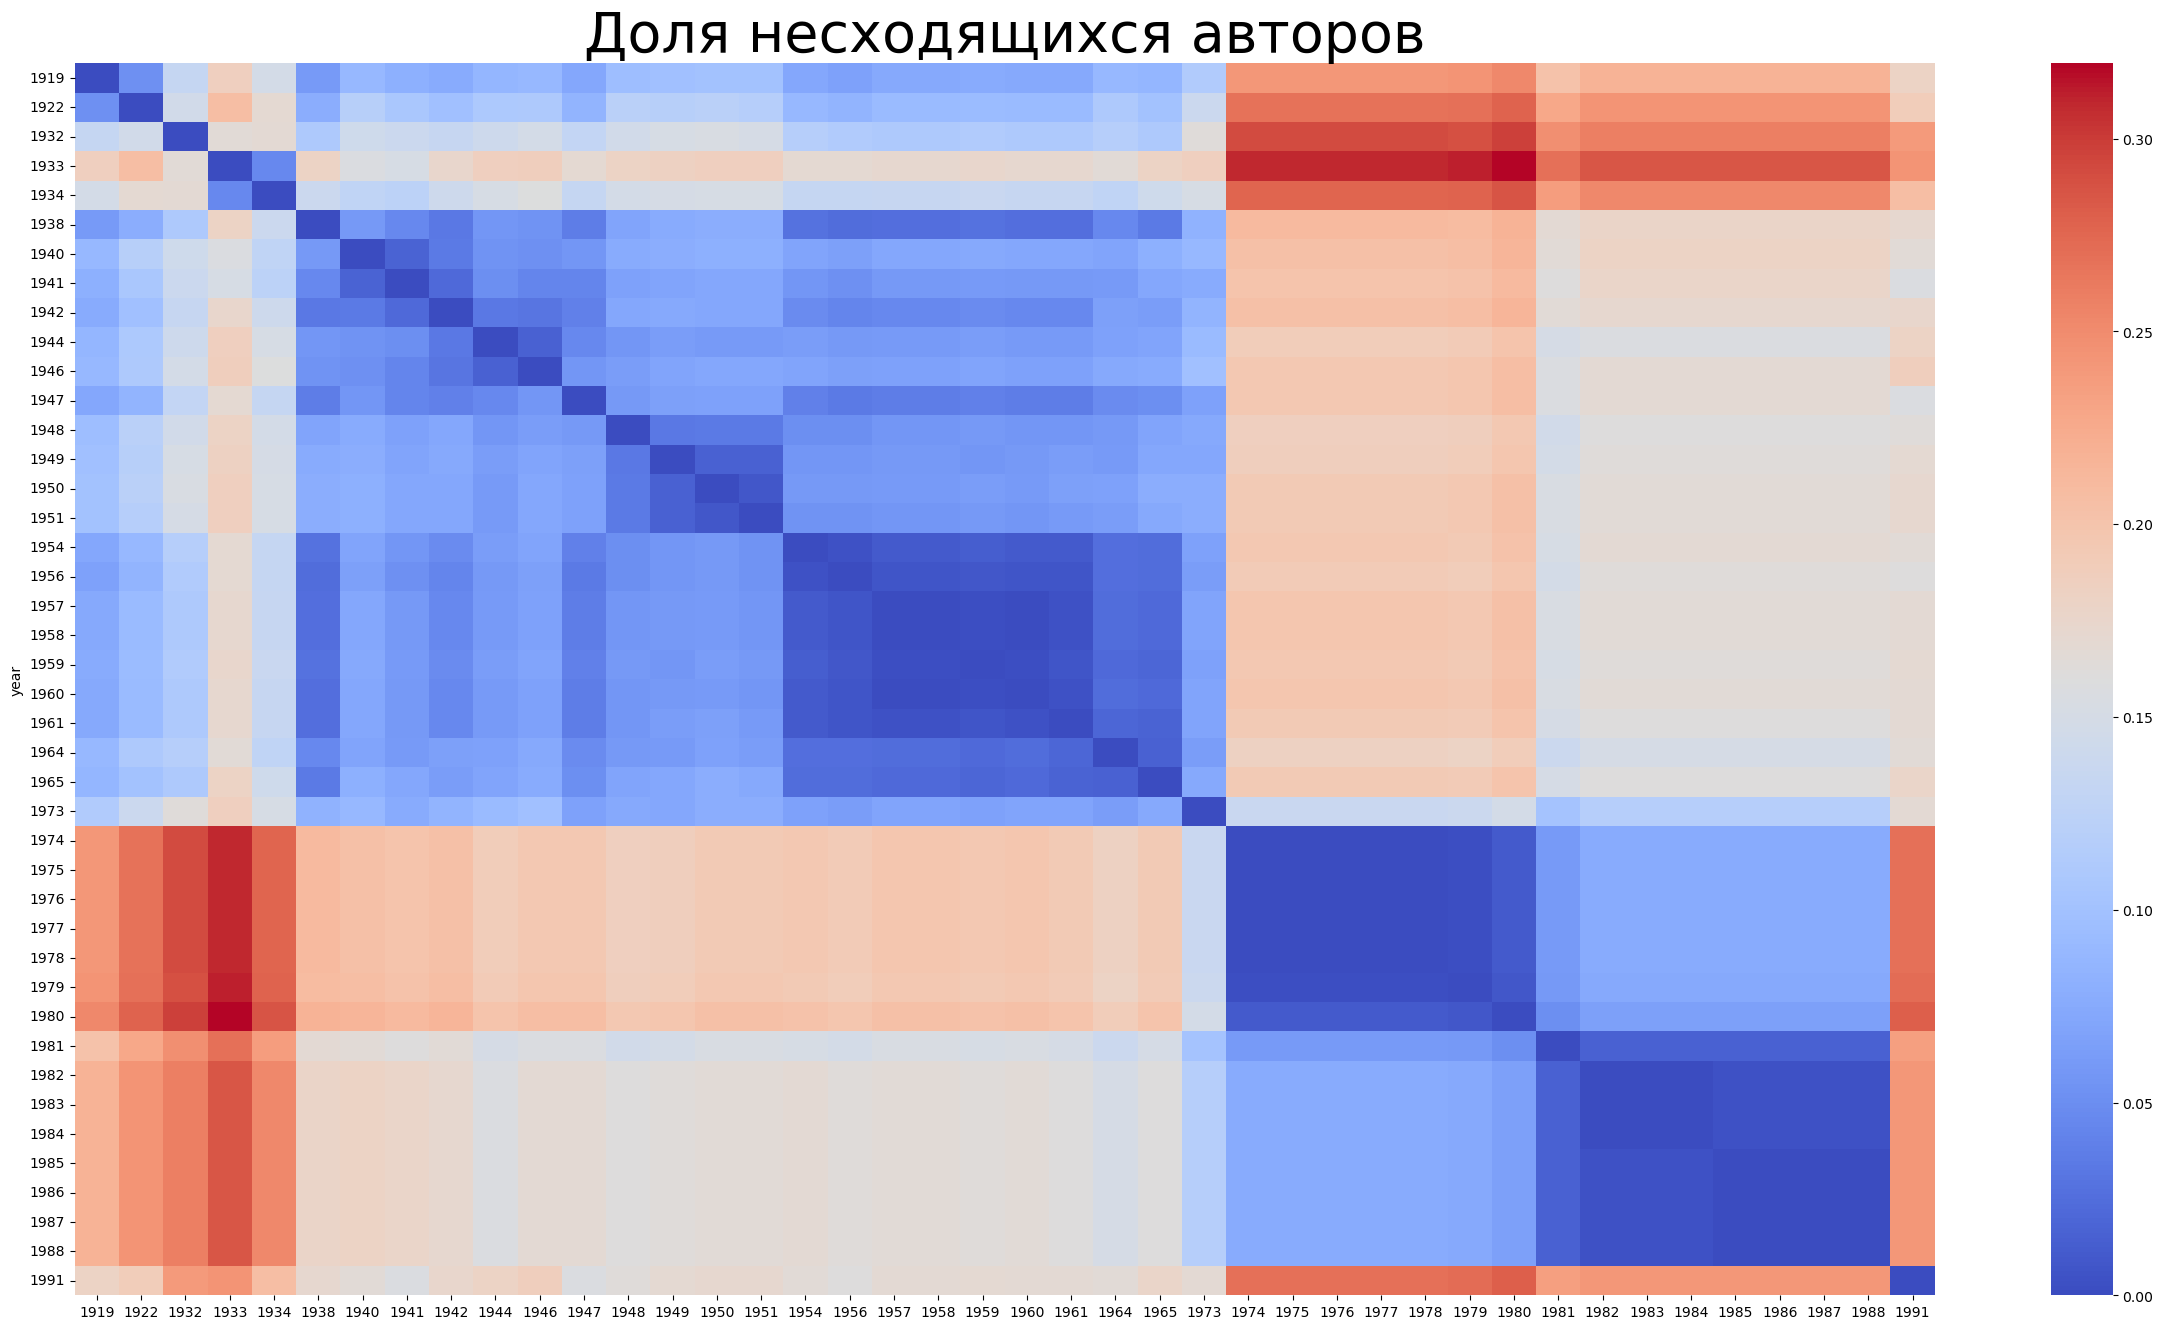

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся авторов', fontsize = 40)
sns.heatmap(dataf, cmap='coolwarm')

In [263]:
pd.set_option('display.max_rows', 25)

<AxesSubplot:title={'center':'Доля несходящихся произведений'}, ylabel='year'>

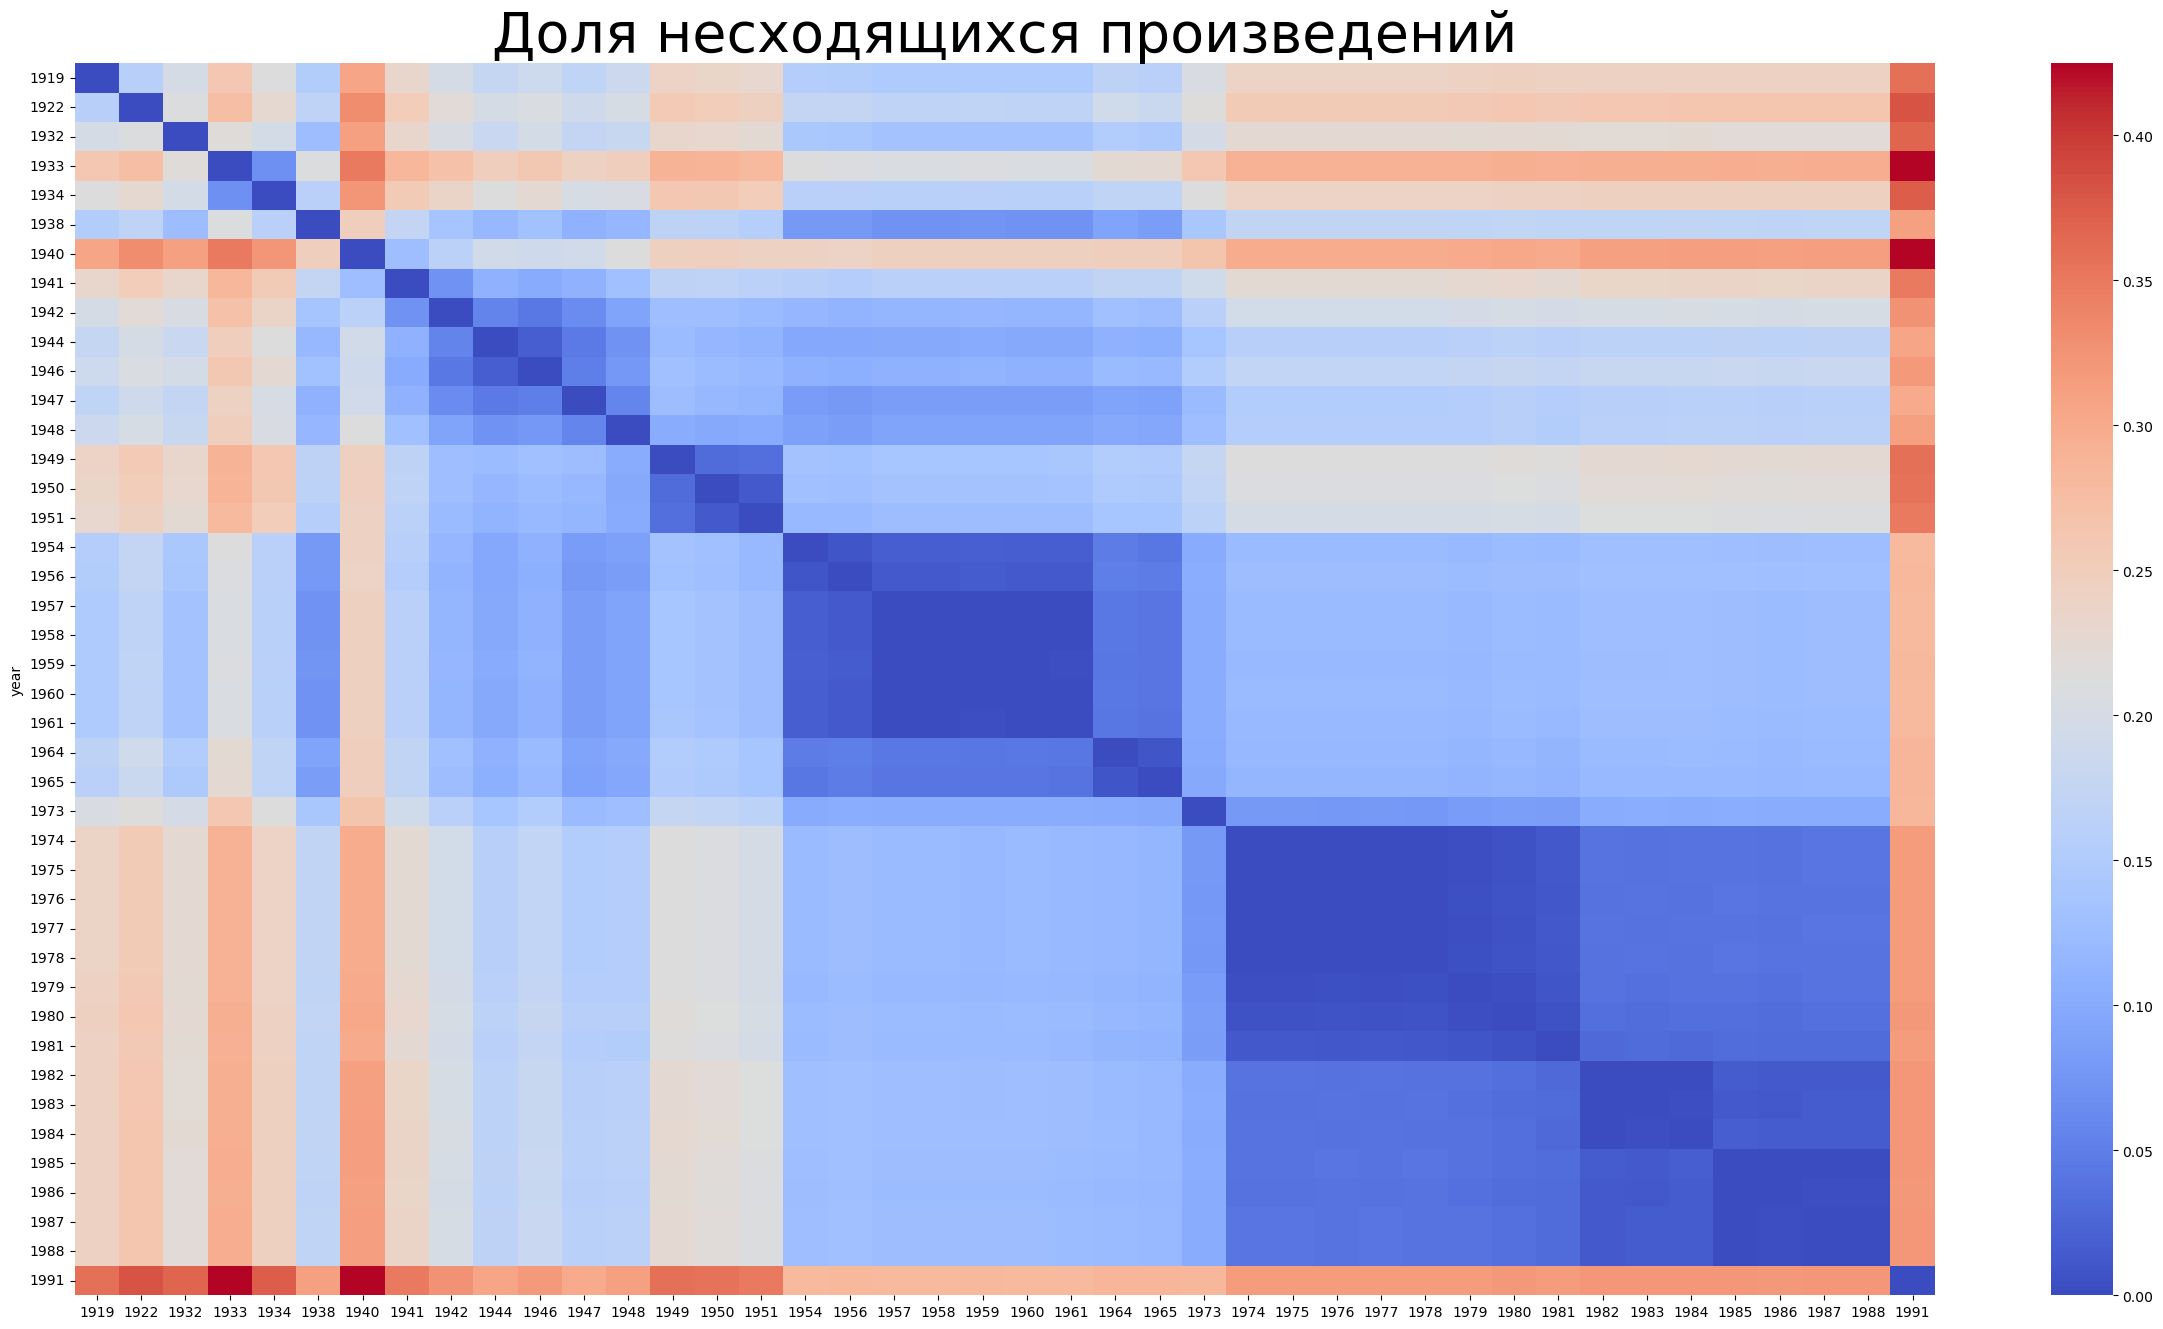

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся произведений', fontsize = 40)
sns.heatmap(dataf1, cmap='coolwarm')

In [322]:
pd.set_option('display.max_rows', 2500)
p_1947 = pivot_df1[1947]
p_1948 = pivot_df1[1948]
d_1947 = pivot_df[1947]
d_1948 = pivot_df[1948]

In [314]:
pros = df_del.merge(pd.DataFrame(p_1947).reset_index().merge(pd.DataFrame(p_1948).reset_index()))
pros

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority,1947,1948
0,0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN,0,0
1,1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN,0,0
2,2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*,0,0
3,5,Герцен А.И.,Кто виноват?,NaN,19 ИРЛ 2 ст,1,1919,8,NaN,0,1
4,6,Гоголь Н.В.,Вечера на Хуторе близ Диканьки,NaN,19 ИРЛ 2 ст,1,1919,8,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7853,10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN,0,0
7854,10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN,0,0
7855,10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN,0,0
7856,10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*,0,0


In [325]:
d_1948 = pd.DataFrame(d_1948).reset_index()
d_1948.rename(columns={1948: 'au_48'}, inplace = True)

In [339]:
pivot_df.to_csv('pivot.csv')

In [338]:
pros = pros.merge(d_1948.merge(d_1947))
pros.to_csv('1947-48.csv')

In [334]:
(pros.merge(d_1948.merge(d_1947))).to_csv('1947-48')

In [323]:
d_1947 = pd.DataFrame(d_1947).reset_index()
d_1947.rename(columns={1947: 'au_47'}, inplace = True)